<a href="https://colab.research.google.com/github/galib96/protein-sequence-class-pfam/blob/main/protein_sequence_classification_with_pfam_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# connecting to google drive
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [2]:
# data_path = "/content/gdrive/MyDrive/Colab Notebooks/Protein Sequence Classification -  Pfam/DATA/pfam/random_split"
# def read_data(partition):
#     data = []
#     for fn in os.listdir(os.path.join(data_path, partition)):
#         with open(os.path.join(data_path, partition, fn)) as f:
#             data.append(pd.read_csv(f, index_col=None))
#     return pd.concat(data)
  
# # reading all data_partitions
# df_train = read_data('train')
# df_val = read_data('dev')
# df_test = read_data('test')

# df_train.head()

In [16]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Protein Sequence Classification -  Pfam/DATA/train.csv',
                       nrows = 200000)
df_val = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Protein Sequence Classification -  Pfam/DATA/val.csv',
                     nrows = 10000)
df_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Protein Sequence Classification -  Pfam/DATA/test.csv',
                      nrows = 10000)

print("Training set size", df_train.shape)
print("Val set size", df_val.shape)
print("Test Set size", df_test.shape)

df_train.head()

Training set size (200000, 6)
Val set size (10000, 6)
Test Set size (10000, 6)


,Unnamed: 0,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,0,MORN_2,Q8EI47_SHEON/428-449,PF07661.13,LHGEFRNQTSSGQLLELI.NFNH,LHGEFRNQTSSGQLLELINFNH
1,1,Plexin_cytopl,H2TB23_TAKRU/1240-1793,PF08337.12,.MPFLDYKTYTDCNFFLPSKDGAND......AMITRKLQIPE.......,MPFLDYKTYTDCNFFLPSKDGANDAMITRKLQIPEARRAIVAQALN...
2,2,RT_RNaseH,H3H8E9_PHYRM/405-501,PF17917.1,DYSRRFHVFADAS.GH.QIGGVIVQ........................,DYSRRFHVFADASGHQIGGVIVQGRRILACFSRSMTDTQKKYSTME...
3,3,Transposase_20,Q981X5_RHILO/224-313,PF02371.16,VEAYQAMRGASFLVAVIFAAEI.GDV.RR.FDTPPQLMAFLGLVPG...,VEAYQAMRGASFLVAVIFAAEIGDVRRFDTPPQLMAFLGLVPGERS...
4,4,Mycobact_memb,MMPS4_MYCLE/16-154,PF05423.13,LSRIWIPLVILVVLVVGGFVVYRVHSYFASEKRESYADSNLGSSKP...,LSRIWIPLVILVVLVVGGFVVYRVHSYFASEKRESYADSNLGSSKP...


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


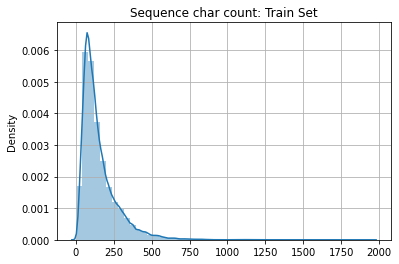

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


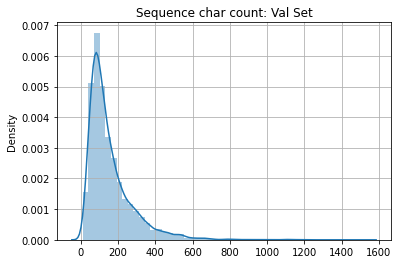

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


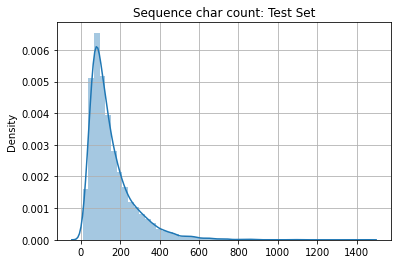

In [17]:
# finding length of the sequence

df_train['sequence_length'] = df_train['sequence'].apply(lambda x: len(x))
df_test['sequence_length'] = df_test['sequence'].apply(lambda x: len(x))
df_val['sequence_length'] = df_val['sequence'].apply(lambda x: len(x))

# plotting count by sequence lengths
def plot_seq_len(df, df_name):
    sns.distplot(df['sequence_length'].values)
    plt.title(f'Sequence char count: {df_name}')
    plt.grid(True)
    plt.show()

plot_seq_len(df_train, "Train Set")
plot_seq_len(df_val, "Val Set")
plot_seq_len(df_test, "Test Set")

In [18]:
code_numeric = {' ':0, 'A':1, 'R':2, 'N':3, 'D':4, 'B':5, 'C':6, 'E':7, 'Q':8, 'Z':9, 'G':10, 'H':11, 'I':12, 'X':13, 
                 'L':13, 'K':14, 'M':15, 'F':16, 'P':17, 'S':18, 'T':19, 'W':20, 'Y':21, 'V':22, 'U':23, 'O':24}

code_numeric

{' ': 0,
 'A': 1,
 'B': 5,
 'C': 6,
 'D': 4,
 'E': 7,
 'F': 16,
 'G': 10,
 'H': 11,
 'I': 12,
 'K': 14,
 'L': 13,
 'M': 15,
 'N': 3,
 'O': 24,
 'P': 17,
 'Q': 8,
 'R': 2,
 'S': 18,
 'T': 19,
 'U': 23,
 'V': 22,
 'W': 20,
 'X': 13,
 'Y': 21,
 'Z': 9}

In [19]:
def int_encoding(sequence):
    encode = []
    for code in sequence:
        encode.append(code_numeric.get(code, 0))
  
    return np.array(encode)

# test case
int_encoding('QWERTYUIOPLKJHGFDSAZXCVBNM QWEEWQLKFA MDSNMZLPOTIGRT')

array([ 8, 20,  7,  2, 19, 21, 23, 12, 24, 17, 13, 14,  0, 11, 10, 16,  4,
       18,  1,  9, 13,  6, 22,  5,  3, 15,  0,  8, 20,  7,  7, 20,  8, 13,
       14, 16,  1,  0, 15,  4, 18,  3, 15,  9, 13, 17, 24, 19, 12, 10,  2,
       19])

In [20]:
df_train['encoded'] = df_train['sequence'].apply(int_encoding)
df_val['encoded'] = df_val['sequence'].apply(int_encoding)
df_test['encoded'] = df_test['sequence'].apply(int_encoding)

df_train.head()

,Unnamed: 0,family_id,sequence_name,family_accession,aligned_sequence,sequence,sequence_length,encoded
0,0,MORN_2,Q8EI47_SHEON/428-449,PF07661.13,LHGEFRNQTSSGQLLELI.NFNH,LHGEFRNQTSSGQLLELINFNH,22,"[13, 11, 10, 7, 16, 2, 3, 8, 19, 18, 18, 10, 8..."
1,1,Plexin_cytopl,H2TB23_TAKRU/1240-1793,PF08337.12,.MPFLDYKTYTDCNFFLPSKDGAND......AMITRKLQIPE.......,MPFLDYKTYTDCNFFLPSKDGANDAMITRKLQIPEARRAIVAQALN...,554,"[15, 17, 16, 13, 4, 21, 14, 19, 21, 19, 4, 6, ..."
2,2,RT_RNaseH,H3H8E9_PHYRM/405-501,PF17917.1,DYSRRFHVFADAS.GH.QIGGVIVQ........................,DYSRRFHVFADASGHQIGGVIVQGRRILACFSRSMTDTQKKYSTME...,97,"[4, 21, 18, 2, 2, 16, 11, 22, 16, 1, 4, 1, 18,..."
3,3,Transposase_20,Q981X5_RHILO/224-313,PF02371.16,VEAYQAMRGASFLVAVIFAAEI.GDV.RR.FDTPPQLMAFLGLVPG...,VEAYQAMRGASFLVAVIFAAEIGDVRRFDTPPQLMAFLGLVPGERS...,90,"[22, 7, 1, 21, 8, 1, 15, 2, 10, 1, 18, 16, 13,..."
4,4,Mycobact_memb,MMPS4_MYCLE/16-154,PF05423.13,LSRIWIPLVILVVLVVGGFVVYRVHSYFASEKRESYADSNLGSSKP...,LSRIWIPLVILVVLVVGGFVVYRVHSYFASEKRESYADSNLGSSKP...,139,"[13, 18, 2, 12, 20, 12, 17, 13, 22, 12, 13, 22..."
